<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Exploration de données d'enquête en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a>:  explication du seuil de revenu 

### Résumé
Analyse de données extraites d'un recensement aux USA de 1994. Préparation des données, exploration élémentaire et multidimensionnelle ([ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)), [classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf). L'objectif est de préparer l'[étape suivante](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) consistant à modéliser / prévoir le niveau de revenu.

## Introduction
Des données publiques disponibles sur le site [UCI repository](http://archive.ics.uci.edu/ml/) sont extraites de la base de données issue du recensement réalisé aux Etats Unis en 1994. Ces données son largement utilisées et font référence comme outil de *benchmark* pour comparer les performances de méthodes d’apprentissage ou modélisation statistique. L’objectif est alors de prévoir la variable binaire « revenu annuel » supérieur ou inférieur à 50k$. Le travail décrit dans ce document est un préalable, il propose une exploration des données pour en appréhender les grandes structures. Il ne s’agit pas encore de données massives mais 32.561 individus sont décrits par les 14 variables du tableau ci-dessous :

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		>50K, <=50K

Une première étape permet de vérifier, sélectionner, recoder les données, avant d’aborder des outils plus élaborés. Les questions suivent la chronologie de ce déroulement.

La deuxième étape cherchant un meilleur modèle de prévision du dépassement de seuil de revenu est détaillée dans un [scénario](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) de la [saison 3: Apprentissage](https://github.com/wikistat/Apprentissage).


**Répondre aux questions en s'aidant des résultats des exécutions**.

## 1 Préparation des données


In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [56]:
#Lecture
listeVar=['Age','workClass', 'fnlwgt', 'education', 'educNum', 'mariStat', 'occup', 'relationship',
          'origEthn', 'sex', 'capitalGain', 'capitalLoss', 'hoursWeek', 'nativCountry', 'income']

path="https://www.math.univ-toulouse.fr/~besse/Wikistat/data/adultCensus.dat"
dataBase = pd.read_csv(path, sep=',', header=None, index_col=False, names=listeVar,dtype={"workClass":object,"education":object,"mariStat":object,"occup":object,"relationship":object,"origEthn":object,"sex":object,"nativCountry":object,"income":object})
dataBase.head()

,Age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pour chaque variable qualitative, on renomme les modalités afin de pouvoir les manipuler plus facilement. Durant cette manipulation, on regroupe certaines modalités afin de ne plus avoir des modalités à trop faible effectif.

In [57]:
#dataBase["workClass"]=pd.Categorical(dataBase["workClass"],ordered=False)
#dataBase["education"]=pd.Categorical(dataBase["education"],ordered=False)
#dataBase["mariStat"]=pd.Categorical(dataBase["mariStat"],ordered=False)
#dataBase["occup"]=pd.Categorical(dataBase["occup"],ordered=False)
#dataBase["relationship"]=pd.Categorical(dataBase["relationship"],ordered=False)
#dataBase["origEthn"]=pd.Categorical(dataBase["origEthn"],ordered=False)
#dataBase["sex"]=pd.Categorical(dataBase["sex"],ordered=False)
#dataBase["nativCountry"]=pd.Categorical(dataBase["nativCountry"],ordered=False)
#dataBase["income"]=pd.Categorical(dataBase["income"],ordered=False)
dataBase.dtypes

Age              int64
workClass       object
fnlwgt           int64
education       object
educNum          int64
mariStat        object
occup           object
relationship    object
origEthn        object
sex             object
capitalGain      int64
capitalLoss      int64
hoursWeek        int64
nativCountry    object
income          object
dtype: object

In [58]:
#workClass 
cat_workClass={" federal-gov": "Federal-Govt",
               " local-gov": "Other-Govt",
               " state-gov": "Other-Govt",
               " private": "Private",
               " self-emp-inc": "Self-Employed",
               " self-emp-not-inc": "Self-Employed",
               " without-pay": "Not-Working",
               " never-worked": "Not-Working"}
dataBase["workClass"]=dataBase.workClass.map(str.lower).map(cat_workClass)

In [59]:
#education
cat_education={" 10th": "Dropout",
               " 11th": "Dropout",
               " 12th": "Dropout",
               " 1st-4th":"Dropout",
               " 5th-6th": "Dropout",
               " 7th-8th": "Dropout",
               " 9th": "Dropout",
               " assoc-acdm": "Associates",
               " assoc-voc": "Associates",
               " bachelors": "Bachelors",
               " doctorate": "Doctorate",
               " hs-grad": "HS-Graduate",
               " masters": "Masters",
               " preschool": "Dropout",
               " prof-school": "Prof-School",
               " some-college": "HS-Graduate"}
dataBase["education"]=dataBase.education.map(str.lower).map(cat_education)

In [60]:
#mariStat
cat_mariStat={" never-married" : "Never-Married",
              " married-af-spouse" : "Married",
              " married-civ-spouse" : "Married",
              " married-spouse-absent" : "Not-Married",
              " separated" : "Not-Married",
              " divorced" : "Not-Married",
              " widowed" : "Widowed"
             }
dataBase["mariStat"]=dataBase.mariStat.map(str.lower).map(cat_mariStat)

In [61]:
#occup
cat_occup={" adm-clerical": "Admin",
           " armed-forces": "Military",
           " craft-repair": "Blue-Collar",
           " exec-managerial": "White-Collar",
           " farming-fishing": "Blue-Collar",
           " handlers-cleaners": "Blue-Collar",
           " machine-op-inspct": "Blue-Collar",
           " other-service": "Service",
           " priv-house-serv": "Service",
           " prof-specialty": "Professional",
           " protective-serv": "Other-occups",
           " sales": "Sales",
           " tech-support": "Other-occups",
           " transport-moving": "Blue-Collar",
          }
dataBase["occup"]=dataBase.occup.map(str.lower).map(cat_occup)
dataBase["occup"]=dataBase["occup"].replace("Miltary",np.nan)

In [62]:
#origEthn
cat_origEthn={" white": "White",
              " black": "Black",
              " amer-indian-eskimo": "Amer-Indian",
              " asian-pac-islander": "Asian",
              " other": "Other"
             }
dataBase["origEthn"]=dataBase.origEthn.map(str.lower).map(cat_origEthn)

In [63]:
#nativCountry
cat_nativCountry={" cambodia": "SE-Asia",
                  " canada": "British-Commonwealth",
                  " china": "China",
                  " columbia": "South-America",
                  " cuba": "Other",
                  " dominican-republic": "Latin-America",
                  " ecuador": "South-America",
                  " el-salvador": "South-America",
                  " england": "British-Commonwealth",
                  " france": "Euro_1",
                  " germany": "Euro_1",
                  " greece": "Euro_2",
                  " guatemala": "Latin-America",
                  " haiti": "Latin-America",
                  " holand-netherlands": "Euro_1",
                  " honduras": "Latin-America",
                  " hong": "China",
                  " hungary": "Euro_2",
                  " india": "British-Commonwealth",
                  " iran": "Other",
                  " ireland": "British-Commonwealth",
                  " italy": "Euro_1",
                  " jamaica": "Latin-America",
                  " japan": "Other",
                  " laos": "SE-Asia",
                  " mexico": "Latin-America",
                  " nicaragua": "Latin-America",
                  " outlying-us(guam-usvi-etc)": "Latin-America",
                  " peru": "South-America",
                  " philippines": "SE-Asia",
                  " poland": "Euro_2",
                  " portugal": "Euro_2",
                  " puerto-rico": "Latin-America",
                  " scotland": "British-Commonwealth",
                  " south": "Euro_2",
                  " taiwan": "China",
                  " thailand": "SE-Asia",
                  " trinadad&tobago": "Latin-America",
                  " united-states": "United-States",
                  " vietnam": "SE-Asia",
                  " yugoslavia": "Euro_2"
                 }
dataBase["nativCountry"]=dataBase.nativCountry.map(str.lower).map(cat_nativCountry)

L'utilisation de "map" pour le regroupement des variables nous permet de remplacer automatiquement la valeur des variables des individus possédant un "?" par des "NaN". Cependant, une option lors de l'importation des données aurait pu nous permettre de corriger ce problème directement.

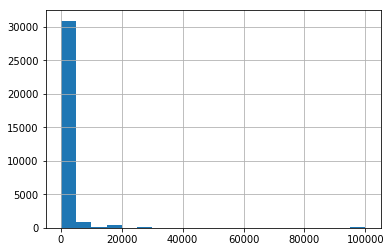

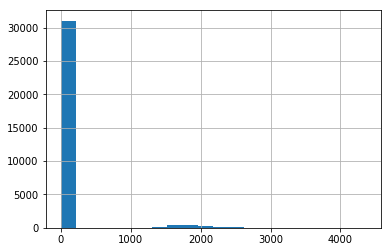

In [64]:
dataBase["capitalGain"].hist(bins=20)
plt.show()
dataBase["capitalLoss"].hist(bins=20)
plt.show()

Pour les variables "capitalGain" et "capitalLoss", la distribution est biaisée à droite car il y a quelques valeurs avec une très grande abscisse et donc éloignées de la majorité des valeurs. Nous effectuons donc une transformation logarithmique afin de rapprocher ces valeurs extrêmes.

In [65]:
#LcapitalGain et LcapitalLoss
dataBase["LcapitalGain"]=np.log(1+dataBase["capitalGain"])
dataBase["LcapitalLoss"]=np.log(1+dataBase["capitalLoss"])

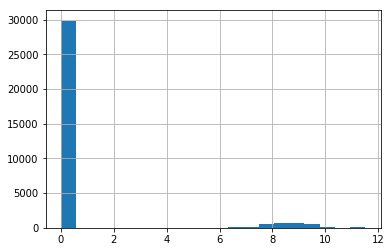

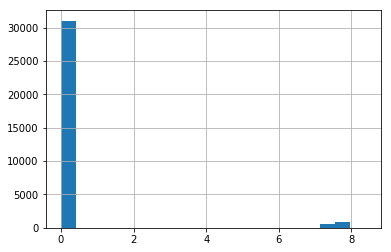

In [66]:
dataBase["LcapitalGain"].hist(bins=20)
plt.show()
dataBase["LcapitalLoss"].hist(bins=20)
plt.show()

On observe bien le rapprochement des valeurs extrêmes.

Ensuite, on transforme les variables quantitatives "capitalGain" et "capitalLoss" en variables qualitatives à 3 modalités, obtenues à partir du calcul de la médiane. Si les variables ont des valeurs négatives, elles seront placées dans la catégorie "None". Si elles sont comprises entre 0 et la médiane des valeurs positives, elles seront placées dans la catégorie "cgLow". Sinon, elles sont placées dans la catégorie "cgHigh".

In [67]:
#capitalGain et capitalLoss
import math
dataBase["capitalGain"]=pd.cut(dataBase.capitalGain,bins=[-math.inf,0,np.median(dataBase.capitalGain[dataBase.capitalGain>0]),+math.inf],labels=["None", "cgLow", "cgHigh"])
dataBase["capitalLoss"]=pd.cut(dataBase.capitalLoss,bins=[-math.inf,0,np.median(dataBase.capitalLoss[dataBase.capitalLoss>0]),+math.inf],labels=["None", "cgLow", "cgHigh"])

On transforme la variable "income" pour avoir des modalités plus éclairantes pour l'analyse.

In [68]:
dataBase["income"]=np.where(dataBase["income"]==" <=50K","incLow","incHigh")

On crée une nouvelle variable qualitative "ageQ", qui à partir de la variable "Age", situe un individu dans des modalités suivantes : "Ag1","Ag2","Ag3","Ag4","Ag5". On souhaite avoir le même effectif pour chaque modalité, on utilise la fonction "qcut" utilisant les quantiles.

In [69]:
dataBase["ageQ"]=pd.qcut(dataBase.Age,q=5,labels=["Ag1","Ag2","Ag3","Ag4","Ag5"]) 

On crée une nouvelle variable qualitative "hoursWeekQ", qui à partir de la variable "hoursWeek", situe un individu dans des modalités suivantes : "HW1","HW2","HW3".

In [70]:
dataBase["hoursWeekQ"]=pd.cut(dataBase.hoursWeek,bins=[0,39,41,100],labels=["HW1","HW2","HW3"])

On supprime les individus possédant des variables de valeur NaN.

In [71]:
dataBase = dataBase.dropna(axis=0)

In [72]:
dataBase

,Age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.000000,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.000000,Ag4,HW1
2,38,Private,215646,HS-Graduate,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.000000,Ag2,HW2
5,37,Private,284582,Masters,14,Married,White-Collar,Wife,White,Female,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
6,49,Private,160187,Dropout,5,Not-Married,Service,Not-in-family,Black,Female,None,None,16,Latin-America,incLow,0.000000,0.000000,Ag4,HW1
7,52,Self-Employed,209642,HS-Graduate,9,Married,White-Collar,Husband,White,Male,None,None,45,United-States,incHigh,0.000000,0.000000,Ag5,HW3
8,31,Private,45781,Masters,14,Never-Married,Professional,Not-in-family,White,Female,cgHigh,None,50,United-States,incHigh,9.552866,0.000000,Ag2,HW3
9,42,Private,159449,Bachelors,13,Married,White-Collar,Husband,White,Male,cgLow,None,40,United-States,incHigh,8.552367,0.000000,Ag4,HW2


## 2 Description
**Q** Quelle est la population étudiée ? Quel est l’échantillon ?

**Q** Commenter, justifier les différentes transformations opérées. Repérer les variables quantitatives, qualitatives. Certaines (`age`, `hoursWeek`) sont présentes sous les deux types. Beaucoup de modalités on déjà été regroupées, notamment celles de `nativCountry` (voir le programme) certaines variables sont rendues qualitatives (`capitalLoss` ou `Gain`).

La popoulation étudiée est la population recensée aux Etats-Unis en 1994. L'échantillon que l'on va utiliser est celui des 30162 individus obtenus après nettoyage. 

Les regroupements de modalités ou modifications de classe ont été expliquées au fur et à mesure du nettoyage. 

In [73]:
dataBase.dtypes

Age                int64
workClass         object
fnlwgt             int64
education         object
educNum            int64
mariStat          object
occup             object
relationship      object
origEthn          object
sex               object
capitalGain     category
capitalLoss     category
hoursWeek          int64
nativCountry      object
income            object
LcapitalGain     float64
LcapitalLoss     float64
ageQ            category
hoursWeekQ      category
dtype: object

In [74]:
dataBase.describe()

,Age,fnlwgt,educNum,hoursWeek,LcapitalGain,LcapitalLoss
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,40.931238,0.743647,0.355226
std,13.134665,1.056530e+05,2.549995,11.979984,2.470518,1.595010
min,17.000000,1.376900e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,40.000000,0.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,11.512925,8.379539


/usr/local/insa/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/insa/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,0,'log(1+CapitalGain)')]

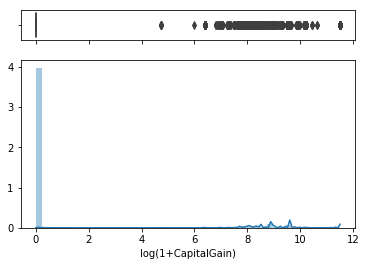

In [75]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataBase["LcapitalGain"], ax=ax_box)
sns.distplot(dataBase["LcapitalGain"], norm_hist=True, ax=ax_hist)

ax_box.set(xlabel='')
ax_hist.set(xlabel='log(1+CapitalGain)')

**Q** Quels sont ces graphiques? Que dire de la transformation  opérée ? La variable CapitalLoss subit le même traitement.

In [76]:
pd.crosstab(dataBase["relationship"],dataBase["sex"])

sex,Female,Male
relationship,,
Husband,1,12462
Not-in-family,3566,4160
Other-relative,386,503
Own-child,1961,2505
Unmarried,2463,749
Wife,1405,1


In [77]:
pd.crosstab(dataBase["education"],dataBase["educNum"])

educNum,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
Associates,0,0,0,0,0,0,0,0,0,0,1307,1008,0,0,0,0
Bachelors,0,0,0,0,0,0,0,0,0,0,0,0,5044,0,0,0
Doctorate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,375
Dropout,45,151,288,557,455,820,1048,377,0,0,0,0,0,0,0,0
HS-Graduate,0,0,0,0,0,0,0,0,9840,6678,0,0,0,0,0,0
Masters,0,0,0,0,0,0,0,0,0,0,0,0,0,1627,0,0
Prof-School,0,0,0,0,0,0,0,0,0,0,0,0,0,0,542,0


In [78]:
pd.crosstab(dataBase["mariStat"],dataBase["relationship"])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
mariStat,,,,,,
Married,12463,14,119,84,0,1406
Never-Married,0,4448,548,3929,801,0
Not-Married,0,2832,182,441,2068,0
Widowed,0,432,40,12,343,0


In [79]:
pd.crosstab(dataBase["origEthn"],dataBase["nativCountry"])

nativCountry,British-Commonwealth,China,Euro_1,Euro_2,Latin-America,Other,SE-Asia,South-America,United-States
origEthn,,,,,,,,,
Amer-Indian,0,1,1,2,9,0,1,1,271
Asian,88,122,2,71,6,43,290,0,273
Black,9,0,7,0,164,6,1,1,2629
Other,6,0,1,0,86,5,0,20,113
White,225,6,213,146,783,139,12,191,24218


**Q** Quel est ce problème général ? Qu’est-ce qui va se passer si on en calcule l’analyse des correspondances ? Quel est le problème plus spécifique des variables `relationship` et `sex`?

Le problème générale est la redondance de certaines informations. 

En effet, on a par exemple, pour le tableau entre `educNum` et `education`, beaucoups de cellules d'effectif nul. Pour les relations entre le `relationship` et `mariStat` les composantes `married`,`husband` et `wife` regroupent toutes la même information. Pour le tableau recoupant `origEthn` et `nativCountry`, certaines cellules présentent des effectifs très faibles et sont donc non significatives. 

Il faudra faire attention à n'utiliser qu'une des deux variables de chaque couple lors de l'analyse de correspondances afin d'éviter la redondance.

Le problème spécifique des variables `relationship` et `sex` est le fait qu'il y ait une femme dans la catégorie époux et un homme dans la catégorie épouse.

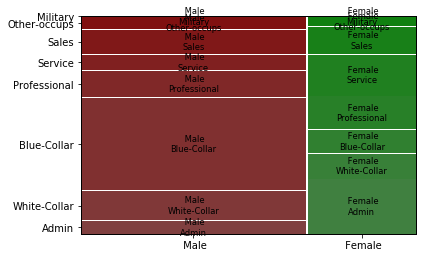

In [84]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(dataBase,["sex","occup"]) 
plt.show()

In [ ]:
#ESSAYER D4AMELIORER LA TAILLE